# Simple regression with TensorFlow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [21]:
X = np.load("./rbfs/phi_reduce.npy")
y = np.load("./rbfs/y.npy")

In [22]:
X = X[0:100000, :]
y = y[0:100000]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [25]:
X.shape

(100000, 201)

In [39]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [40]:

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), # SGD is short for stochastic gradient descent
              metrics=["mae"])

In [41]:

# Fit the model
model.fit(X_test, y_test, epochs=20, shuffle=True, batch_size=128) # this will break with TensorFlow 2.7.0+
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)#

Epoch 1/20
157/157 [==============================] - 1s 2ms/step - loss: 6.3280 - mae: 6.3280
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 6.3204 - mae: 6.3204
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 6.3179 - mae: 6.3179
Epoch 4/20
157/157 [==============================] - 0s 3ms/step - loss: 6.3171 - mae: 6.3171
Epoch 5/20
157/157 [==============================] - 0s 3ms/step - loss: 6.3166 - mae: 6.3166
Epoch 6/20
157/157 [==============================] - 0s 3ms/step - loss: 6.3165 - mae: 6.3165
Epoch 7/20
157/157 [==============================] - 0s 3ms/step - loss: 6.3164 - mae: 6.3164
Epoch 8/20
157/157 [==============================] - 0s 2ms/step - loss: 6.3162 - mae: 6.3162
Epoch 9/20
157/157 [==============================] - 0s 2ms/step - loss: 6.3163 - mae: 6.3163
Epoch 10/20
157/157 [==============================] - 0s 2ms/step - loss: 6.3162 - mae: 6.3162
Epoch 11/20
157/157 [============================

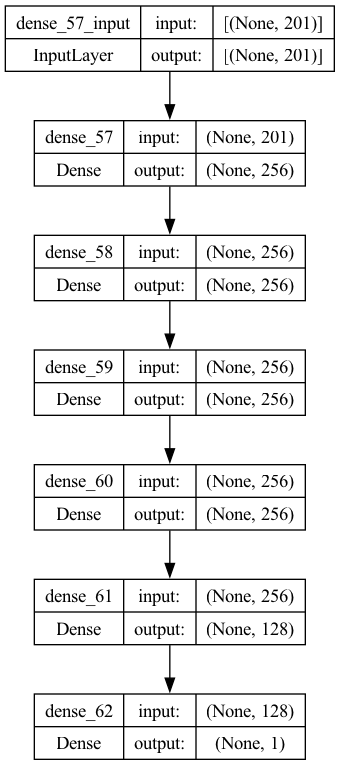

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

625/625 [==============================] - 0s 681us/step


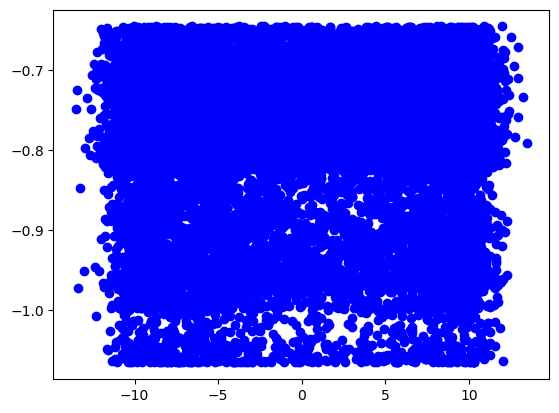

In [43]:
y_hat = model.predict(X_test)
plt.plot(y_test, y_hat, 'bo')

## Second model

In [6]:
from keras import Sequential

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [8]:
n_feat = X_train.shape[1]

In [9]:
model = models.Sequential([
  layers.Dense(64, activation='relu', input_shape=(n_feat,)),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='linear')
])

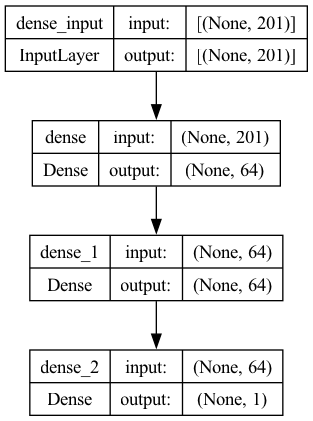

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [11]:
from keras import optimizers
#model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), loss='mse', metrics=['mae'])
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [12]:
# num_epochs = 20
# history = model.fit(X_train, y_train,
#                     batch_size = 32, 
#                     validation_split = 0.1, 
#                     shuffle=True,
#                     epochs=120)

Epoch 1/120
225/225 [==============================] - 0s 819us/step - loss: 49.8276 - mae: 6.3183 - val_loss: 50.1433 - val_mae: 6.3182
Epoch 2/120
225/225 [==============================] - 0s 488us/step - loss: 49.7695 - mae: 6.3171 - val_loss: 50.0887 - val_mae: 6.3176
Epoch 3/120
225/225 [==============================] - 0s 487us/step - loss: 49.7672 - mae: 6.3149 - val_loss: 50.0370 - val_mae: 6.3189
Epoch 4/120
225/225 [==============================] - 0s 489us/step - loss: 49.7664 - mae: 6.3178 - val_loss: 50.0963 - val_mae: 6.3155
Epoch 5/120
225/225 [==============================] - 0s 460us/step - loss: 49.7717 - mae: 6.3169 - val_loss: 50.0881 - val_mae: 6.3178
Epoch 6/120
225/225 [==============================] - 0s 424us/step - loss: 49.7563 - mae: 6.3158 - val_loss: 50.0982 - val_mae: 6.3176
Epoch 7/120
225/225 [==============================] - 0s 417us/step - loss: 49.7633 - mae: 6.3158 - val_loss: 50.0583 - val_mae: 6.3182
Epoch 8/120
225/225 [====================

In [13]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test, verbose=0)

In [14]:
test_mse_score

50.694278717041016

In [15]:
y_hat = model.predict(X_test)

63/63 [==============================] - 0s 320us/step


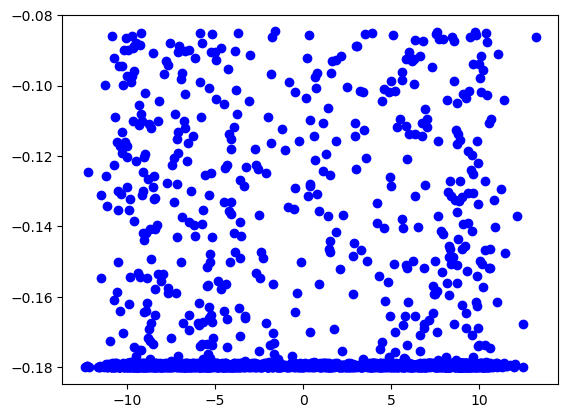

In [16]:
plt.plot(y_test, y_hat, 'bo')